In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection
import random

In [2]:
#read in data
data = pd.read_csv('dataset.csv', sep=',', index_col=0)
data.head()

,Open Price,Close Price,High Price,Low Price,Volume
Date,,,,,
02-Jan-2009,902.99,931.80,934.73,899.35,4048270080
05-Jan-2009,929.17,927.45,936.63,919.53,5413910016
06-Jan-2009,931.17,934.70,943.85,927.28,5392620032
07-Jan-2009,927.45,906.65,927.45,902.37,4704940032
08-Jan-2009,905.73,909.73,910.00,896.81,4991549952


In [3]:
data.reset_index(inplace=True)
data.head()

,Date,Open Price,Close Price,High Price,Low Price,Volume
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952


In [4]:
pre = 0;
for i in range(len(data.index)):
    if(data['Close Price'][i] > pre):
        data.loc[i, 'target'] = 1;
    else:
        data.loc[i, 'target'] = 0;
    pre = data['Close Price'][i];


data.head(10)

,Date,Open Price,Close Price,High Price,Low Price,Volume,target
0,02-Jan-2009,902.99,931.80,934.73,899.35,4048270080,1.0
1,05-Jan-2009,929.17,927.45,936.63,919.53,5413910016,0.0
2,06-Jan-2009,931.17,934.70,943.85,927.28,5392620032,1.0
3,07-Jan-2009,927.45,906.65,927.45,902.37,4704940032,0.0
4,08-Jan-2009,905.73,909.73,910.00,896.81,4991549952,1.0
5,09-Jan-2009,909.91,890.35,911.93,888.31,4716499968,0.0
6,12-Jan-2009,890.40,870.26,890.40,864.32,4725049856,0.0
7,13-Jan-2009,869.79,871.79,877.02,862.02,5017469952,1.0
8,14-Jan-2009,867.28,842.62,867.28,836.93,5407880192,0.0
9,15-Jan-2009,841.99,843.74,851.59,817.04,7807350272,1.0


In [5]:
data.set_index("Date" , inplace=True)

data.head(10)

,Open Price,Close Price,High Price,Low Price,Volume,target
Date,,,,,,
02-Jan-2009,902.99,931.80,934.73,899.35,4048270080,1.0
05-Jan-2009,929.17,927.45,936.63,919.53,5413910016,0.0
06-Jan-2009,931.17,934.70,943.85,927.28,5392620032,1.0
07-Jan-2009,927.45,906.65,927.45,902.37,4704940032,0.0
08-Jan-2009,905.73,909.73,910.00,896.81,4991549952,1.0
09-Jan-2009,909.91,890.35,911.93,888.31,4716499968,0.0
12-Jan-2009,890.40,870.26,890.40,864.32,4725049856,0.0
13-Jan-2009,869.79,871.79,877.02,862.02,5017469952,1.0
14-Jan-2009,867.28,842.62,867.28,836.93,5407880192,0.0


In [6]:
#get training set
train = data[:'29-Dec-2017']
train.head()

,Open Price,Close Price,High Price,Low Price,Volume,target
Date,,,,,,
02-Jan-2009,902.99,931.80,934.73,899.35,4048270080,1.0
05-Jan-2009,929.17,927.45,936.63,919.53,5413910016,0.0
06-Jan-2009,931.17,934.70,943.85,927.28,5392620032,1.0
07-Jan-2009,927.45,906.65,927.45,902.37,4704940032,0.0
08-Jan-2009,905.73,909.73,910.00,896.81,4991549952,1.0


In [7]:
#get test set
test = data['02-Jan-2018':]
test.head()

,Open Price,Close Price,High Price,Low Price,Volume,target
Date,,,,,,
02-Jan-2018,2683.73,2695.81,2695.89,2682.36,1846463232,1.0
03-Jan-2018,2697.85,2713.06,2714.37,2697.77,2090595328,1.0
04-Jan-2018,2719.31,2723.99,2729.29,2719.07,2100767744,1.0
05-Jan-2018,2731.33,2743.15,2743.45,2727.92,1918869120,1.0
08-Jan-2018,2742.67,2747.71,2748.51,2737.60,1894823936,1.0


In [8]:
y_train = train['target']

y_train.head()

Date
02-Jan-2009    1.0
05-Jan-2009    0.0
06-Jan-2009    1.0
07-Jan-2009    0.0
08-Jan-2009    1.0
Name: target, dtype: float64

In [9]:
y_test = test['target']

y_test.head()

Date
02-Jan-2018    1.0
03-Jan-2018    1.0
04-Jan-2018    1.0
05-Jan-2018    1.0
08-Jan-2018    1.0
Name: target, dtype: float64

In [10]:
train = train.drop(['target'], axis=1)

train.head()

,Open Price,Close Price,High Price,Low Price,Volume
Date,,,,,
02-Jan-2009,902.99,931.80,934.73,899.35,4048270080
05-Jan-2009,929.17,927.45,936.63,919.53,5413910016
06-Jan-2009,931.17,934.70,943.85,927.28,5392620032
07-Jan-2009,927.45,906.65,927.45,902.37,4704940032
08-Jan-2009,905.73,909.73,910.00,896.81,4991549952


In [11]:
test = test.drop(['target'], axis=1)

test.head()

,Open Price,Close Price,High Price,Low Price,Volume
Date,,,,,
02-Jan-2018,2683.73,2695.81,2695.89,2682.36,1846463232
03-Jan-2018,2697.85,2713.06,2714.37,2697.77,2090595328
04-Jan-2018,2719.31,2723.99,2729.29,2719.07,2100767744
05-Jan-2018,2731.33,2743.15,2743.45,2727.92,1918869120
08-Jan-2018,2742.67,2747.71,2748.51,2737.60,1894823936


In [12]:
def plot_feature(data, feature_name):
    plt.figure(figsize=(10, 3))
    plt.scatter(data[feature_name], data['target'])
    plt.xlabel(feature_name)
    plt.ylabel('target')
    plt.show()

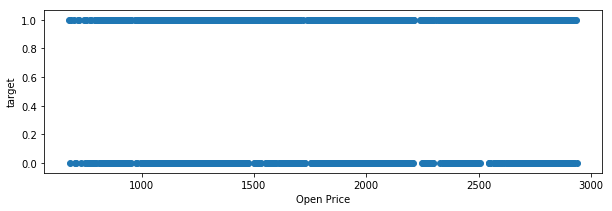

In [13]:
plot_feature(data, 'Open Price')

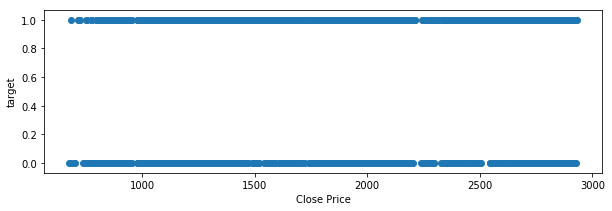

In [14]:
plot_feature(data, 'Close Price')

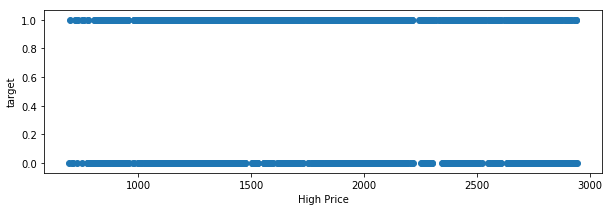

In [15]:
plot_feature(data, 'High Price')

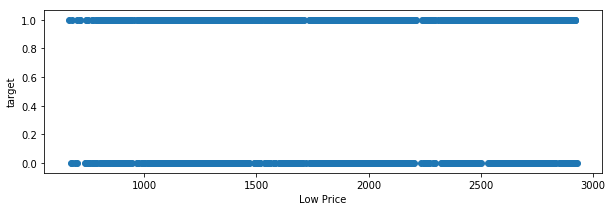

In [16]:
plot_feature(data, 'Low Price')

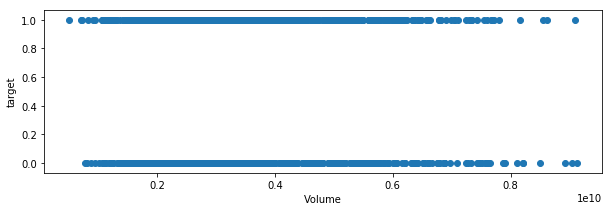

In [17]:
plot_feature(data, 'Volume')

In [18]:
def evaluate(model, x_train, y_train, x_test, y_test):
    train_preds = model.predict(x_train)
    test_preds = model.predict(x_test)
    train_acc = metrics.accuracy_score(y_train, train_preds)
    test_acc = metrics.accuracy_score(y_test, test_preds)
    print('Train accuracy: %s' % train_acc)
    print('Test accuracy: %s' % test_acc)

In [19]:
#def split_train_evaluate(model):
#    model.fit(train, y_train)
#    evaluate(model, train, y_train, test, y_test)

model_bl = linear_model.SGDClassifier(loss='log', max_iter=10000)
#split_train_evaluate(model_bl)
model_bl.fit(train, y_train)
evaluate(model_bl, train, y_train, test, y_test)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Train accuracy: 0.4536219081272085
Test accuracy: 0.47619047619047616


In [20]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(train, y_train)
#split_train_evaluate(clf, data)
clf.fit(train, y_train)
evaluate(clf, train, y_train, test, y_test)

Train accuracy: 0.5463780918727915
Test accuracy: 0.5238095238095238


C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
